# COGS 108 - Final Project 

# Overview

In my final project for COGS 108, I was curious about what may impact the Yelp ratings of a restaurant. In this project, I research if Yelp ratings have a relationship to which month a restaurant decides to start or open. I found that North Carolina restaurants that open in May and September typically tend to have better Yelp ratings. 

# Name & PID

- Name: Todd Nguyen 
- PID: A15183227

# Research Question

Is there a relationship between Yelp ratings to a restaurant's opening month throughout North Carolina Restaurants?

## Background and Prior Work

*Fill in your background and prior work here* 

One of the first and most important steps of data analysis is ensuring that you formulate a specific data science question. When examining the given data for this project, I was instantly drawn to restaurant success. As a good friend to an Elite Yelper, a lot of the restaurants that we decided to go to, before COVID-19 social isolation regulations, were decided by its Yelp rating. Yelp ratings are a cumilation of Yelp users' reviews per specific restaurant reviewed on Yelp. Each review gets to rate the restaurant on a scale of 1 to 5 stars and the restaurant's overall Yelp rating is an average of all those reviews' ratings. 

Personally, for my friends and I, Yelp ratings are important for choosing what restaurants to eat at or purchase take out from. Most people I know utilize the Yelp application for this reason. It's not just my circle of friends either. There are over 35 million average monthly unique users on the Yelp mobile application and 211 million reviews as of March 31, 2020 (1). That's an immense amount of users and reviews that those users have created. Yelp reviews are important and businesses know that. In a 2016 essay called, "Fake it Till You Make It: Reputation, Competition, and Yelp Review Fraud", the authors analyzed Yelp data to find that weak reputed restaurants will be more likely to perform review fraud, in which they write their own or even hire someone to write them a review (2). Thus not only do restaurant goers care, but the actual restaurants also care about Yelp ratings. So to find out more about what affects Yelp ratings my initial question was, "What impacts Yelp ratings in North Carolina restaurants?" 

To clarify, I'm specifically working with North Carolina restaurants because all the data provided in this assignment are from North Carolina businesses. Although this question is a good starting point, it's too vague. To iterate on the question I decided to make the question, "What is an unexpected aspect of North Carolina restaurants that may impact Yelp ratings?" In this question I specified a relationship, although still very broad. After looking through the data given, I noticed that two of the data sets, 'inspections.csv' and 'restaurants.csv', have restaurant open dates. So out of curiousity I updated my question to "Is there a relationship between Yelp ratings to a restaurant's opening month throughout North Carolina Restaurants?"


References:
- 1) "Yelp Newsroom: Fast Facts" https://www.yelp-press.com/company/fast-facts/default.aspx
- 2) "Fake it Till You Make It: Reputation, Competition, and Yelp Review Fraud" https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2015.2304?casa_token=Oq1qFtQ_SG4AAAAA:93uMWWm6pjjipAzM5godntQ_o8oI6DCs8g6QsnecS4IuSRalO9v4ipsk9rF7F2EIr9C0siDrbsw
- 3) "The anatomy of business failure: A qualitative account of its implications for future business success" https://www.emerald.com/insight/content/doi/10.1108/EJMBE-07-2017-001/full/html

# Hypothesis


I hypothesize that restaurants that open in early summer months, specifically June and July, will have higher Yelp ratings than the rest. I anticipate that this because more people, especially the student population, are free during the beginning of summer to eat at restaurants and are typically in a happier mood because they are on summer vacation. Since they would be in a typically happier mood, this would result in higher Yelp ratings for newly opened restaurants right off the bat. 

# Dataset(s)

- Dataset Name: 'restaurants.csv'
- In this dataset, I mainly just used the 'restuarantopendate' column to find out when each restaurant opened business. 


- Dataset Name: 'yelp.csv'
- In this dataset, I mainly used the 'rating' and 'review_count' columns since I am comparing Yelp ratings to when restaurants open. I decided to also keep the number of reviews since I thought it would be interesting to analyze. 


I combined these data sets by first individually storing them into two separate data frames and then merging them with the merge function by address. 

# Setup

In [1]:
# Imports 
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# put the two datasets in two separate data frames
rest_df = pd.read_csv('restaurants.csv')
yelp_df = pd.read_csv('yelp.csv')

In [3]:
# merged the 'yelp.csv' and the 'restaurant.csv' dataframes 
df = pd.merge(yelp_df, rest_df, on = 'address1')

In [4]:
# dropped columns unecessary to our research question 
df = df.drop(columns = ['zip_code', 'latitude', 
                   'longitude', 'address2', 'postalcode', 
                   'phonenumber', 'x', 'y', 'geocodestatus',
                  'id', 'phone', 'hotdogs', 'sandwiches', 'pizza',
                  'bbq', 'bakeries', 'sushi', 'X.objectid', 'burgers',
                  'tradamerican', 'mexican', 'grocery', 'breakfast_brunch',
                  'delis', 'coffee', 'chinese', 'italian', 'newamerican',
                  'chicken_wings', 'bars', 'salad', 'seafood', 'city', 
                  'hsisid', 'name_x', 'price'])

In [5]:
# dropped any duplicate columns based off of address
df = df.drop_duplicates(subset = 'address1', keep = 'first')

In [6]:
# ordering the columns in a neat order
df = df[['name_y', 'rating', 'review_count', 
         'state', 'restaurantopendate', 'facilitytype']]

In [7]:
# renamed the columns 
df = df.rename(columns = {'name_y':'Name', 
                     'rating':'Yelp Rating', 
                     'review_count':'Review Count', 
                          'state':'State', 
                    'restaurantopendate': 'Open Date', 
                    'facilitytype': 'Facility'})

In [8]:
# dropped rows that contained certain Facility values 
df = df[df.Facility !='Food Stand']
df = df[df.Facility !='Mobile Food Units']
df = df[df.Facility !='Meat Market']

# since facility values are now all restaurants and we know they are all
# restaurants in NC, dropped 'Facility' and 'State'
df = df.drop(columns = ['Facility', 'State'])


In [9]:
# sorted the values by Yelp Rating and Review Count, 
# with the highest rating and most reviews at the top

df = df.sort_values(by = ['Yelp Rating', 'Review Count'],
                    ascending = [False, False])

In [10]:
# made a function to convert our dates to months 

def convert_dates(date):
    
    if '-01-' in date: 
        output = 'Jan'
    elif '-02-' in date: 
        output = 'Feb'
    elif '-03-' in date: 
        output = 'Mar'
    elif '-04-' in date: 
        output = 'Apr'
    elif '-05-' in date: 
        output = 'May'
    elif '-06-' in date: 
        output = 'Jun'
    elif '-07-' in date: 
        output = 'Jul'
    elif '-08-' in date:
        output = 'Aug'
    elif '-09-' in date: 
        output = 'Sep'
    elif '-10-' in date: 
        output = 'Oct'
    elif '-11-' in date: 
        output = 'Nov'
    elif '-12-' in date: 
        output = 'Dec'
    
    # if otherwise, keep as it is 
    else: 
        output = string 
        
    return output 

In [11]:
# used the apply function to transform the data in the 'Open Date' column and 
# saved the output inside the dataframe 

df['Open Date'] = df['Open Date'].apply(convert_dates)

In [12]:
# some extra cleaning 

# reset the old index and delete the old index column 
df = df.reset_index()
df = df.drop(columns = 'index')

# rename the Open Date column to Opening Month 
df = df.rename(columns = {'Open Date':'Opening Month'})

In [13]:
# check the data! 
df

,Name,Yelp Rating,Review Count,Opening Month
0,Subway,5.0,40,Sep
1,Scooters Grill And Bar,5.0,1,May
2,Goji Bistro,4.5,81,Dec
3,Goodberry`s Creamery,4.5,30,May
4,Romas Pizzeria,4.5,11,May
5,Bonefish Grill,4.0,145,Oct
6,Moonlight Pizza Company,4.0,133,Jun
7,Little Tokyo,4.0,98,Jan
8,Salvio`s Pizzeria,4.0,56,Mar
9,Mac`s Tavern,4.0,50,Jan


# Data Analysis & Results

First, to understand and get a feel for the data, I'm going to plot the data as a scatter matrix, a count plot, and a box plot. 

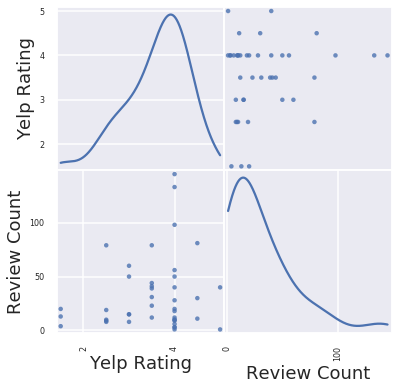

In [14]:
# plotting a scatter matrix of the data
scatter_matrix_fig = pd.plotting.scatter_matrix(df, alpha = 0.8, figsize= (6,6), diagonal ='kde')

A **scatter matrix** is a good way to initially determine if there are any types of correlation between multiple different variables in your table. It overall helps with interpreting the results! In this plot, I use kernel density estimation (KDE) on the diagonal to estimate the density of the distribution of 'Yelp Rating' and 'Review Count'. 

On the diagonal, the first top left plot indicates that a large density of Yelp ratings are mainly about 4 stars. On the bottom right, this plot indicates that a majority of restaurants don't have many reviews. 

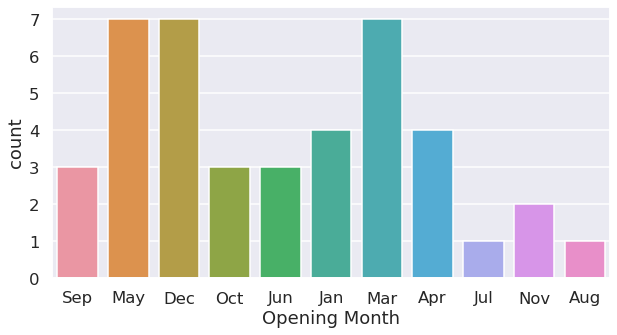

In [15]:
# plotting a count plot of the opening month data
plt.figure(figsize = (10,5))
count_plot_fig = sns.countplot(x = 'Opening Month', data = df)

This is a **count plot**. This plot helps to visualize the values of how many restaurants in North Carolina opened on which specific month. Simply put, it helps to count the observations in each qualitative bin that represent the bars. 

The mode in this plot are May, Dec, and Mar. What is pretty much means is that restaurants in North Carolina most commonly open in March, May, and December. 



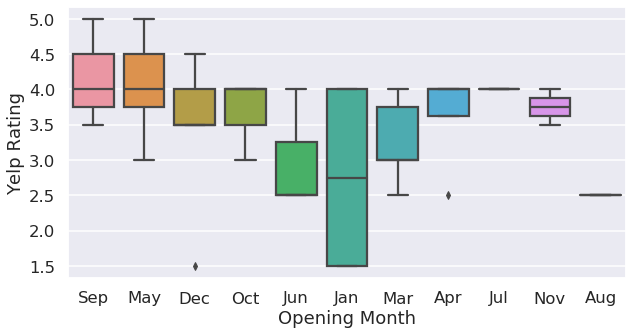

In [16]:
# plotting a box plot of the opening month data to Yelp ratings
plt.figure(figsize = (10,5))
box_plot_fig = sns.boxplot(x = 'Opening Month', y = 'Yelp Rating', data = df)

This is a **box plot** of the Yelp ratings of restaurants broken down by the month they opened. This box plot allows us to see a few different values. 

The middle line in each box represents the median and tells us the typical Yelp rating of a restaurant that opens during that specific month. For instance, a restaurant that opens in November in North Carolina, is shown to have a median in between 4.0 and 3.5, so about 3.75. This allows us to visually see what opening months tend to have higher Yelp ratings on average. The opening months that do result in higher Yelp ratings are May, July, and September. 

The marked horizontal lines seen in the plot also lets us see the typical range of Yelp ratings per opening month. This shows were most of the values fall. For example, in restaurants that open in March, most Yelp ratings will be in between 2.5 to 4.0 stars. 

Lastly, the tiny diamond dots that you can see laying upon December and April are outliers. Outliers are values that fall outside the typical range and are not usual.

This plot shows that the restaurants in North Carolina that open in May and September typically have higher Yelp ratings than restaurants that open in other months. 

# Ethics & Privacy

Data science should always be done in a way that is equitable, have a respect for privacy and consent, and does not further create undue harm. I understand that data science is very powerful process, but it should be done with care to allow any stakeholders to not be harmed.

The data has been posted publicly online and is available. It is from the Yelp Site and there is a wide amount of data on the site.

There is a challenge of ensuring a good measure, to not target specific restaurants since we would be looking for if one restaurant is doing better than the other, and to not harm anyone's jobs. This data makes sure not to point any human being out by making sure no human names are on the data. We're not trying to point out specific restaurants for doing a bad job, we're trying to see if there is a correlation between opening dates and Yelp ratings- that is all. 

There are definitely potential biases in this data set. Especially since Yelp ratings are decided by humans, human bias is hard to avoid. However, the basis of Yelp depends on human opinions and therefore should be encourage in this kind of study. 

# Conclusion & Discussion

I will first restate my hypothesis here: 

*I hypothesize that restaurants that open in early summer months, specifically June and July, will have higher Yelp ratings than the rest. I anticipate that this because more people, especially the student population, are free during the beginning of summer to eat at restaurants and are typically in a happier mood because they are on summer vacation. Since they would be in a typically happier mood, this would result in higher Yelp ratings for newly opened restaurants right off the bat.*

My hypothesis was wrong. Restaurants, in North Carolina, that open business in early summer months, like June and July, do not have higher Yelp ratings than the rest. The opening months that did have the best Yelp ratings for restaurants were actually May and September. This was interesting since they are both months that are right before and right after summer. 

The way I cleaned the data is thoroughly explained in the data cleaning section, but I wanted to address some points. The reason why I decided to use the 'restaurant.csv' instead of the 'inspections.csv', which also has the restaurant open dates, was because the inspections data set had a much larger amount of columns that I would have had to delete myself. If I posed a question that had to do more with inspections, it definitely would have been interesting to use that dataset. However, due to ease, I stuck with using the restaurant data set. Next, I wanted to talk about creating the convert_dates function. Originally, I was planning on just using the dates as is, but I realized that there would just be a large amount of scattered data. Thus, I decided to split the data up by months by creating a function and applying that to the whole dates column. 

The type of analysis I did was primarily discrete exploratory data analysis. I visualized the data with three different plots: a scatter matrix, a count plot, and a box plot. The scatter matrix allowed me to get a gist of the the interpretability of the data. The count plot let me find the mode of how many restaurants were opening during specific months. The box plot allowed me to interpret a few different values: median, typical range, and some outliers. 

Reflecting, I believe my broad question of wondering what different aspects may impact Yelp reviews is still important. I personally grew up with my family owning their own business. Business failure happens and is found to actually help development in a business owner's character (3). However, being able to try to stop failure by doing things like finding new ways to improve Yelp reviews which in turn attracts customers, would create positive change for struggling small businesses. 

One problem I wish I realized earlier was that my sample size was small. After cleaning the data it just passed over my head and I continued to work until I started to visualize the data. Small sample sizes could result in ultimately lower statistical power and lower reliability. Although I wish I had more data to work off of, this data could still possibly impact new North Carolina restaurant owners to plan ahead and decide when they want to open their restaurant. 

Overall, this project was a really interesting and fun experience! It felt nice to be able to go off on my own accord and analyze given data. If I could do things differently, I probably would have tried working with a whole new data set and answer a different question. Despite this question being fun to try to answer, I felt that my data was lacking because of such a small sample size. All in all, this project and this class has taught me so much about how to put data science into practice. 

References:
- 1) "Yelp Newsroom: Fast Facts" https://www.yelp-press.com/company/fast-facts/default.aspx
- 2) "Fake it Till You Make It: Reputation, Competition, and Yelp Review Fraud" https://pubsonline.informs.org/doi/abs/10.1287/mnsc.2015.2304?casa_token=Oq1qFtQ_SG4AAAAA:93uMWWm6pjjipAzM5godntQ_o8oI6DCs8g6QsnecS4IuSRalO9v4ipsk9rF7F2EIr9C0siDrbsw
- 3) "The anatomy of business failure: A qualitative account of its implications for future business success" https://www.emerald.com/insight/content/doi/10.1108/EJMBE-07-2017-001/full/html